In [15]:
import plotly.express as px
import os
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
	         size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= 3000, x1= 3000
    )
])
fig.show()


if not os.path.exists("images"):
    os.mkdir("images")
fig.write_image("images/fig1.png")

In [12]:
df

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716  

[1704 rows x 8 columns]

In [3]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import math

# Load data, define hover text and bubble size
data = px.data.gapminder()
df_2007 = data[data['year']==2007]
df_2007 = df_2007.sort_values(['continent', 'country'])

hover_text = []
bubble_size = []

for index, row in df_2007.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Life Expectancy: {lifeExp}<br>'+
                      'GDP per capita: {gdp}<br>'+
                      'Population: {pop}<br>'+
                      'Year: {year}').format(country=row['country'],
                                            lifeExp=row['lifeExp'],
                                            gdp=row['gdpPercap'],
                                            pop=row['pop'],
                                            year=row['year']))
    bubble_size.append(math.sqrt(row['pop']))

df_2007['text'] = hover_text
df_2007['size'] = bubble_size
sizeref = 2.*max(df_2007['size'])/(100**2)

# Dictionary with dataframes for each continent
continent_names = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
continent_data = {continent:df_2007.query("continent == '%s'" %continent)
                              for continent in continent_names}

# Create figure
fig = go.Figure()

for continent_name, continent in continent_data.items():
    fig.add_trace(go.Scatter(
        x=continent['gdpPercap'], y=continent['lifeExp'],
        name=continent_name, text=continent['text'],
        marker_size=continent['size'],
        ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Life Expectancy v. Per Capita GDP, 2007',
    xaxis=dict(
        title='GDP per capita (2000 dollars)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Life Expectancy (years)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()
import os

if not os.path.exists("images"):
    os.mkdir("images")
fig.write_image("images/fig1.png")

In [4]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)

N = 100
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
sz = np.random.rand(N) * 30

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode="markers",
    marker=go.scatter.Marker(
        size=sz,
        color=colors,
        opacity=0.6,
        colorscale="Viridis"
    )
))

fig.show()

In [5]:
fig.write_image("images/fig2.jpeg")

In [6]:
fig.write_image("images/fig3.webp")

In [18]:
from __future__ import division
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()
from bubbly.bubbly import bubbleplot

figure = bubbleplot(dataset=gapminder_indicators, x_column='gdpPercap', y_column='lifeExp', 
    bubble_column='country', time_column='year', size_column='pop', color_column='continent', 
    x_title="GDP per Capita", y_title="Life Expectancy", title='Gapminder Global Indicators',
    x_logscale=True, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

NameError: name 'gapminder_indicators' is not defined

/home/sneupane/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


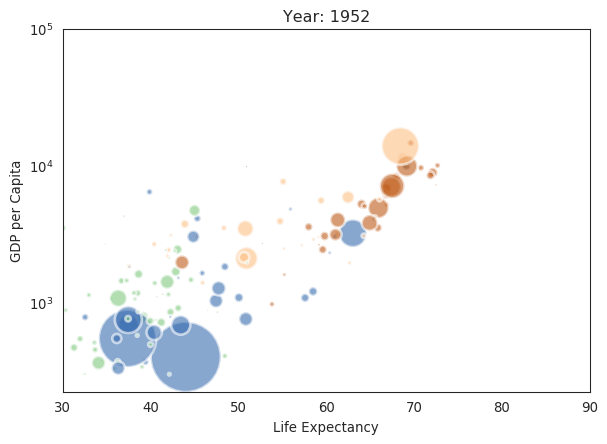

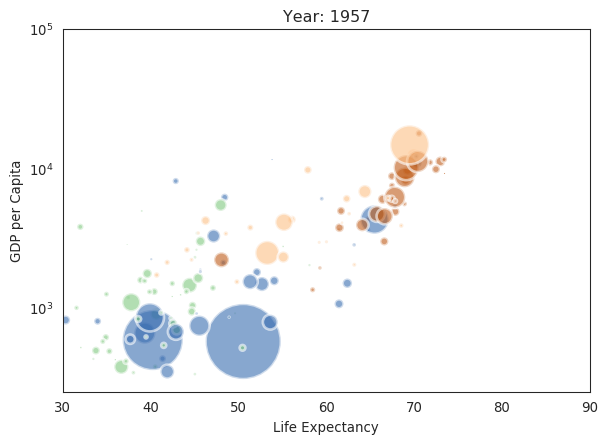

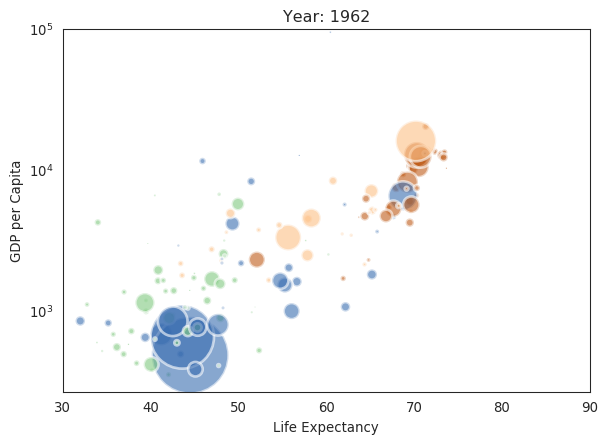

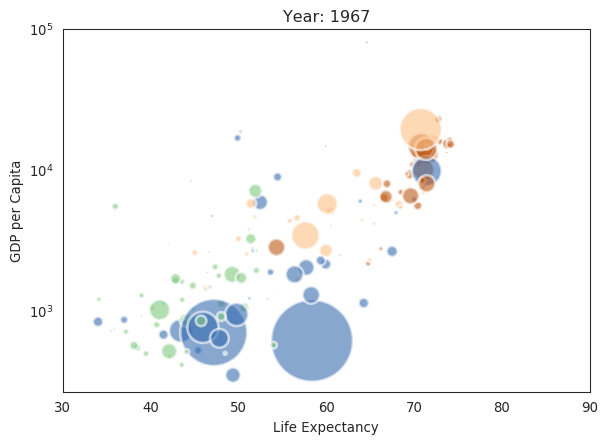

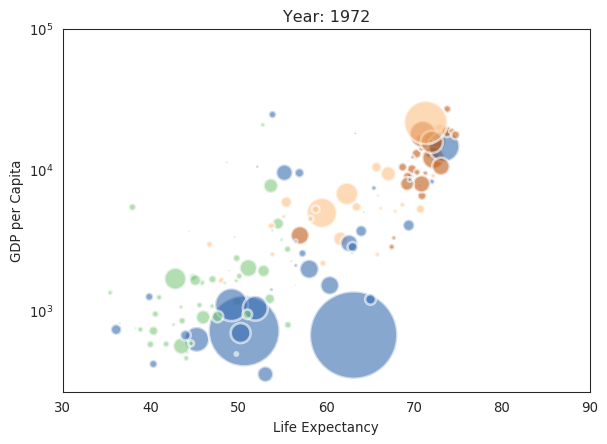

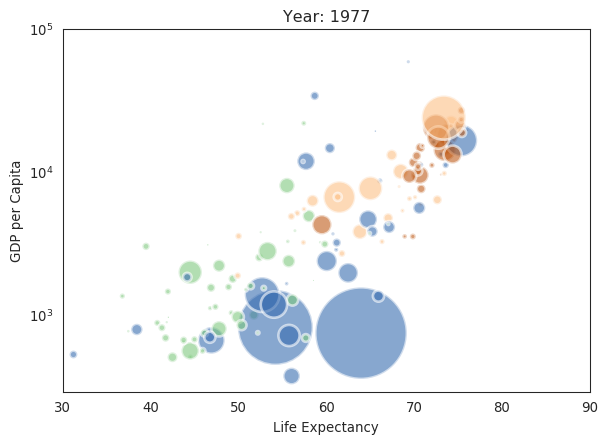

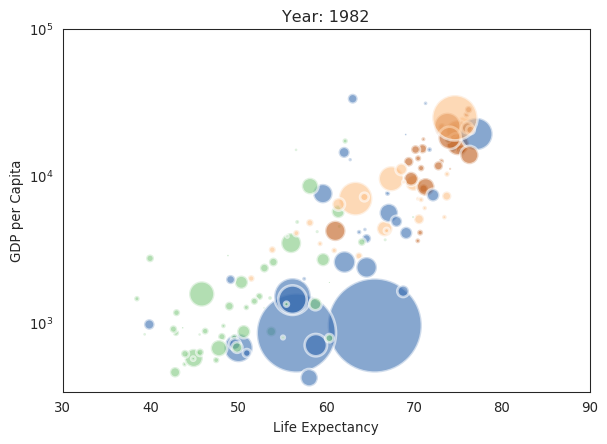

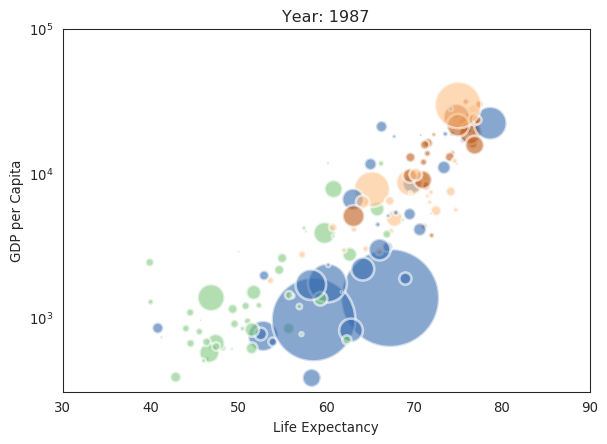

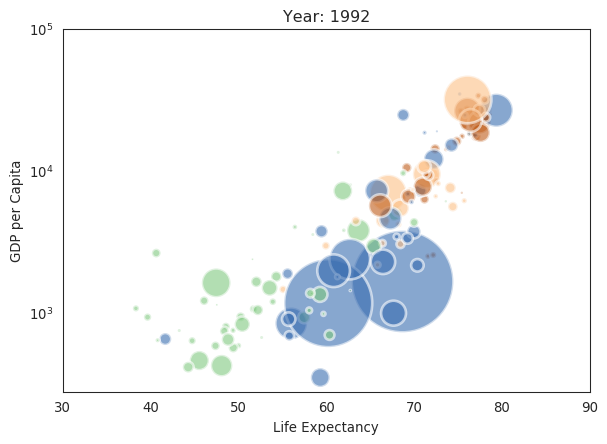

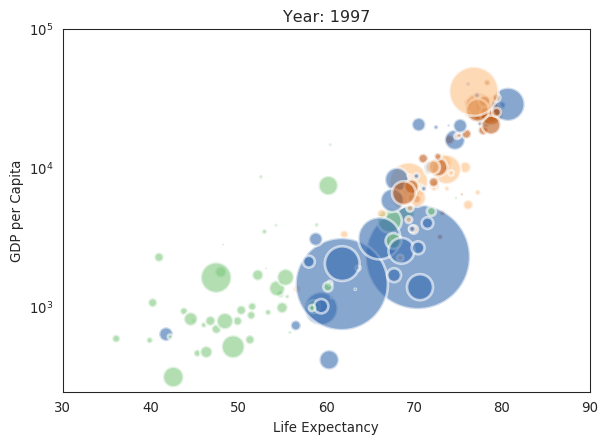

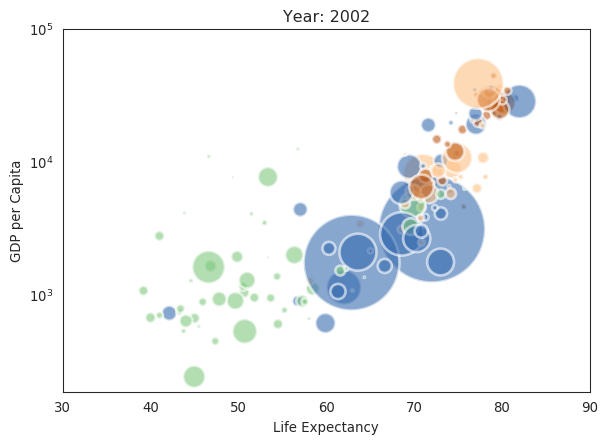

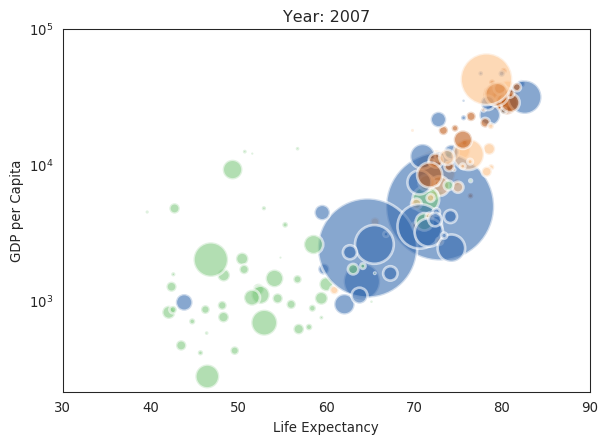

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96
 
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
 
# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])
 
# For each year:
for i in data.year.unique():
 
# initialize a figure
    fig = plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)

    # Change color with c and alpha. I map the color to the X axis value.
    tmp=data[ data.year == i ]
    plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)

    # Add titles (main and on axis)
    plt.yscale('log')
    plt.xlabel("Life Expectancy")
    plt.ylabel("GDP per Capita")
    plt.title("Year: "+str(i) )
    plt.ylim(0,100000)
    plt.xlim(30, 90)

    # Save it
    filename='Gapminder_step'+str(i)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()
    
    # Then use image magick (this is bash, not python)
#     convert -delay 80 Gapminder*.png animated_gapminder.gif


In [5]:
data

country  year         pop continent  lifeExp   gdpPercap
0     Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1     Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2     Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3     Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4     Afghanistan  1972  13079460.0      Asia   36.088  739.981106
...           ...   ...         ...       ...      ...         ...
1699     Zimbabwe  1987   9216418.0    Africa   62.351  706.157306
1700     Zimbabwe  1992  10704340.0    Africa   60.377  693.420786
1701     Zimbabwe  1997  11404948.0    Africa   46.809  792.449960
1702     Zimbabwe  2002  11926563.0    Africa   39.989  672.038623
1703     Zimbabwe  2007  12311143.0    Africa   43.487  469.709298

[1704 rows x 6 columns]